# **Imports**

In [1]:
#Needed imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing  import StandardScaler
import statsmodels.api as sm

In [2]:
# importing data
test = pd.read_csv('datasets/test.csv')
sample = pd.read_csv('datasets/sample_sub_reg.csv')
train = pd.read_csv('datasets/train.csv')

# ***Understanding Data***

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [4]:
print(f'test shape {test.shape} sample: {sample.shape} train: {train.shape}')

test shape (878, 80) sample: (878, 2) train: (2051, 81)


In [5]:
columns_test = list(test.columns)

In [6]:
columns_sample = list(sample.columns)

In [7]:
columns_train = list(train.columns)

In [8]:
train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [9]:
train['SalePrice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [10]:
train['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

# ***Removing none pertincate data/ Creating my features for the model***

In [11]:
train = train.drop(columns=['MS SubClass','Street','Alley','Lot Config','Land Slope','Condition 1','Condition 2',
                            'Year Remod/Add','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type',
                            'Mas Vnr Area','Bsmt Exposure','BsmtFin Type 2','BsmtFin SF 2','Electrical','Fireplaces',
                            'Fireplace Qu','Garage Yr Blt','Garage Finish','Garage Area','Garage Qual','Garage Cond',
                            'Pool QC','Fence','Misc Feature','Yr Sold','Sale Type'])
test = test.drop(columns=['MS SubClass','Street','Alley','Lot Config','Land Slope','Condition 1','Condition 2',
                            'Year Remod/Add','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type',
                            'Mas Vnr Area','Bsmt Exposure','BsmtFin Type 2','BsmtFin SF 2','Electrical','Fireplaces',
                            'Fireplace Qu','Garage Yr Blt','Garage Finish','Garage Area','Garage Qual','Garage Cond',
                            'Pool QC','Fence','Misc Feature','Yr Sold','Sale Type'])

In [12]:
test.shape

(878, 50)

In [13]:
train.shape

(2051, 51)

In [14]:
#Creating an age of house column and removing the built year
train['Age_house'] = [2020 - train['Year Built'][x] for x in range(len(train['Year Built']))]
test['Age_house'] = [2020 - test['Year Built'][x] for x in range(len(test['Year Built']))]
test.drop(columns='Year Built', inplace = True)

In [15]:
#fixing Null Values
train['Lot Frontage'].fillna(train['Lot Frontage'].mean(), inplace = True)
test['Lot Frontage'].fillna(test['Lot Frontage'].mean(), inplace = True)
train['Garage Type'].fillna('NA', inplace = True)
train['Bsmt Qual'].fillna('NA', inplace = True)
train['Bsmt Cond'].fillna('NA', inplace = True)
train['BsmtFin Type 1'].fillna('NA', inplace = True)
test['Garage Type'].fillna('NA', inplace = True)
test['Bsmt Qual'].fillna('NA', inplace = True)
test['Bsmt Cond'].fillna('NA', inplace = True)
test['BsmtFin Type 1'].fillna('NA', inplace = True)
train['Bsmt Full Bath'].fillna(0, inplace = True)
train['Bsmt Half Bath'].fillna(0, inplace = True)
train['BsmtFin SF 1'].fillna(0, inplace = True)
train['Garage Cars'].fillna(0, inplace = True)
train['Bsmt Unf SF'].fillna(0, inplace = True)

In [16]:
train.columns

Index(['Id', 'PID', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Utilities', 'Neighborhood', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC',
       'Central Air', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Garage Type', 'Garage Cars',
       'Paved Drive', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch',
       '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold',
       'SalePrice', 'Age_house'],
      dtype='object')

In [17]:
train.shape

(2051, 52)

# ***EDA***

<AxesSubplot:>

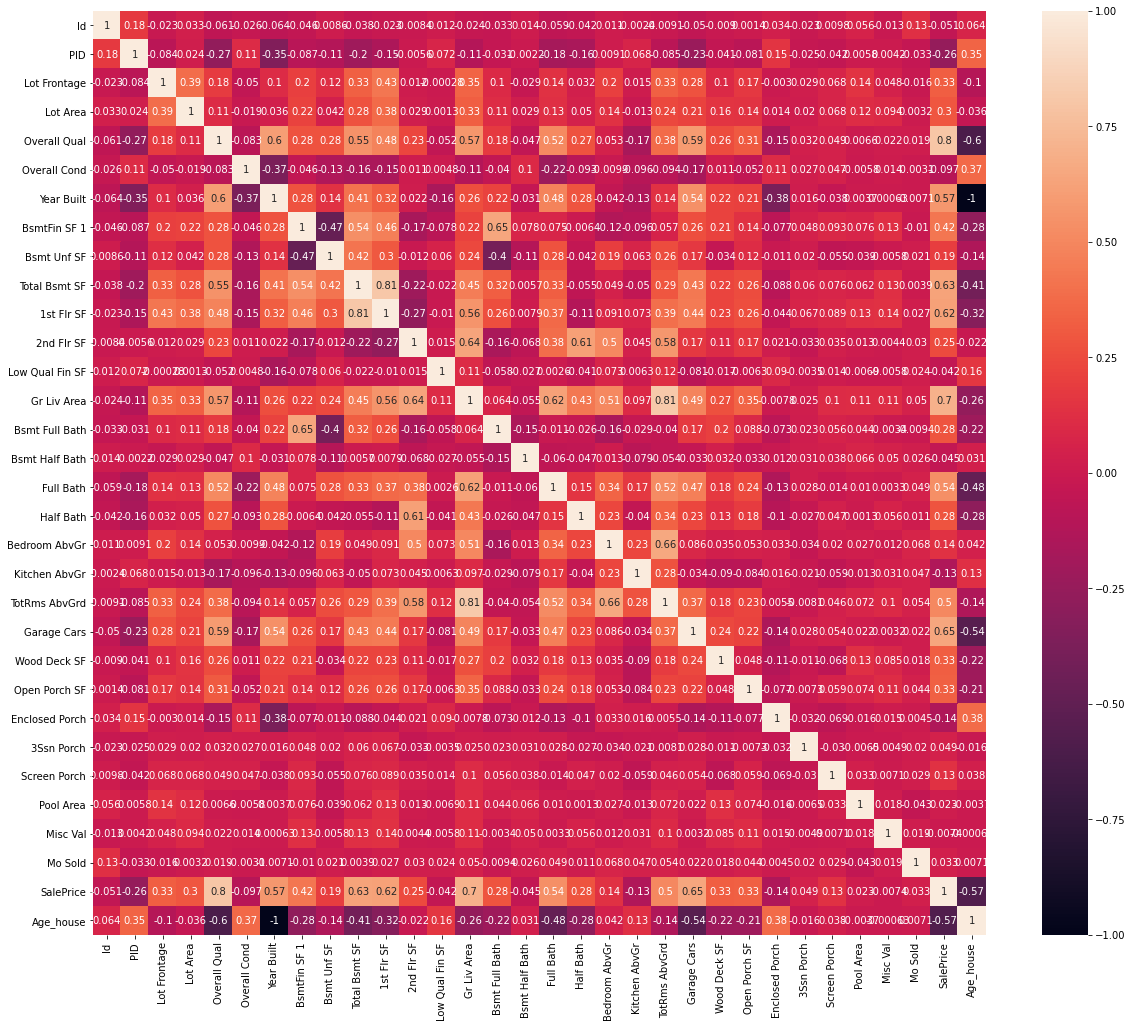

In [18]:
plt.figure(figsize=(20,17))
sns.heatmap(train.corr(), annot= True)

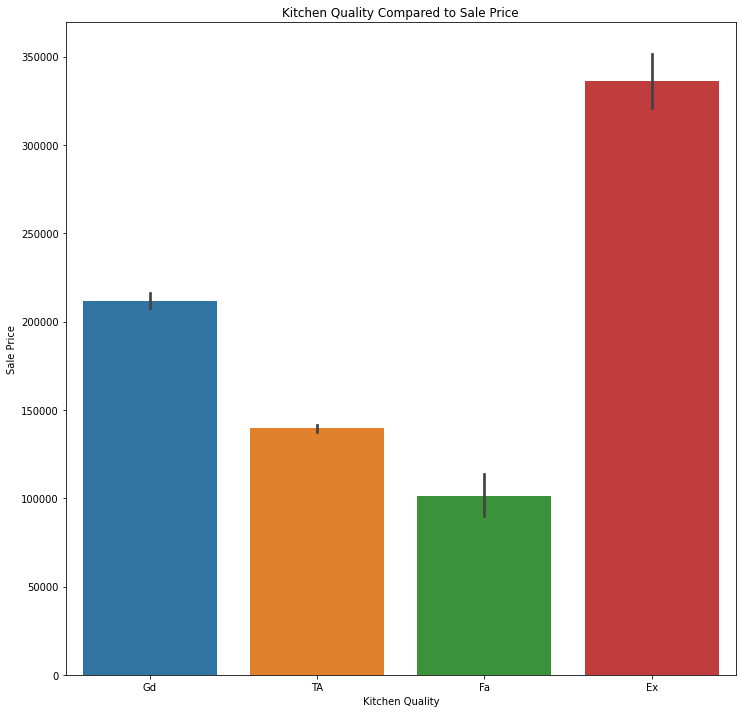

In [19]:
#adapted from a stack overflow
plt.figure(figsize=(12,12))
plot = sns.barplot(x= train['Kitchen Qual'], y= train['SalePrice']);
plot.set(xlabel='Kitchen Quality', ylabel='Sale Price', title ='Kitchen Quality Compared to Sale Price');


[Text(0.5, 0, 'Overall Quality'),
 Text(0, 0.5, 'Sale Price'),
 Text(0.5, 1.0, 'Overall Home Quality')]

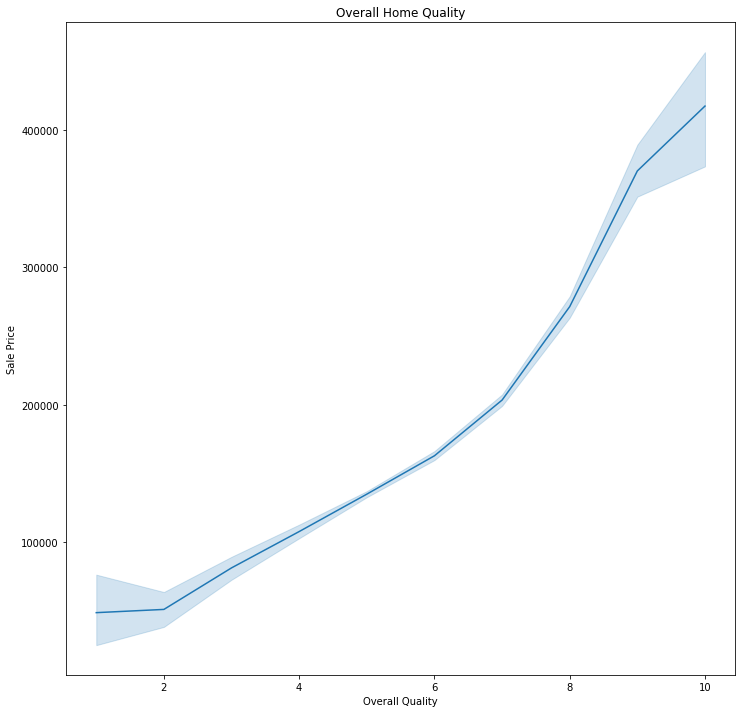

In [20]:
plt.figure(figsize=(12,12))
plot = sns.lineplot(x = train['Overall Qual'], y = train['SalePrice']);
plot.set(xlabel='Overall Quality', ylabel='Sale Price', title='Overall Home Quality')

[Text(0.5, 0, 'Exterior Condtion'),
 Text(0, 0.5, 'Sale Price'),
 Text(0.5, 1.0, 'Overall Exterior Conditon')]

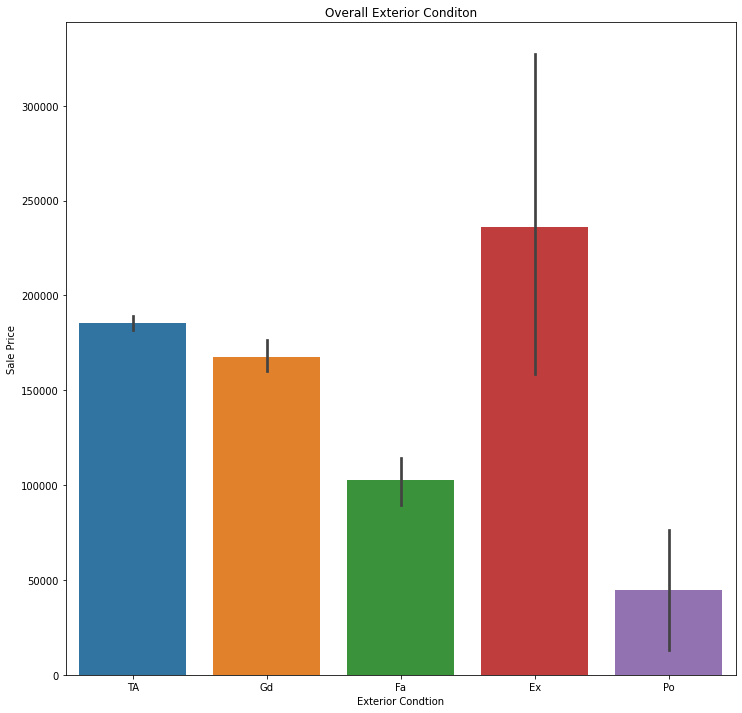

In [21]:
plt.figure(figsize=(12,12))
plot = sns.barplot(x = train['Exter Cond'], y = train['SalePrice']);
plot.set(xlabel='Exterior Condtion', ylabel='Sale Price', title='Overall Exterior Conditon')

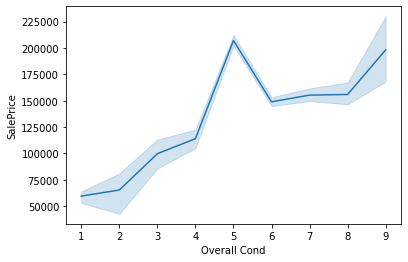

In [22]:
#Noticing some form of outlier 
sns.lineplot(x = train['Overall Cond'], y = train['SalePrice']);

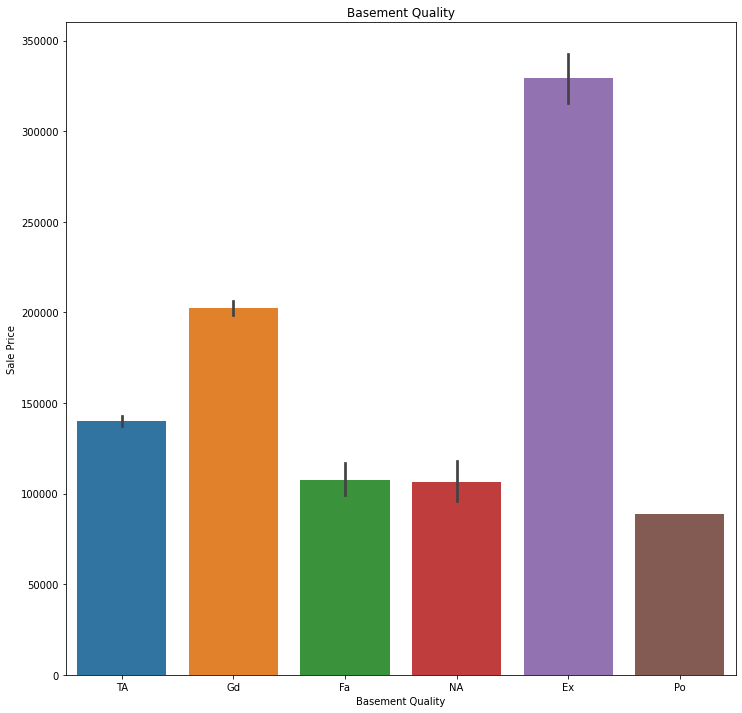

In [23]:
plt.figure(figsize=(12,12))
plot = sns.barplot(x = train['Bsmt Qual'], y =train['SalePrice']);
plot.set(xlabel='Basement Quality', ylabel='Sale Price', title='Basement Quality');

In [25]:
train.shape

(2051, 52)

In [26]:
test['House Style'].value_counts()

1Story    422
2Story    274
1.5Fin     96
SLvl       34
SFoyer     33
2.5Unf     10
1.5Unf      7
2.5Fin      2
Name: House Style, dtype: int64

In [27]:
train.shape

(2051, 52)

In [28]:
train = pd.get_dummies(data = train, columns = ['Central Air'])
test = pd.get_dummies(data = test, columns = ['Central Air'])
train = pd.get_dummies(data = train, columns= ['House Style'])
test = pd.get_dummies(data = test, columns = ['House Style'])
train = pd.get_dummies(data = train, columns= ['Bsmt Qual'])
test = pd.get_dummies(data = test, columns = ['Bsmt Qual'])
train = pd.get_dummies(data = train, columns= ['Bsmt Cond'])
test = pd.get_dummies(data = test, columns = ['Bsmt Cond'])
train = pd.get_dummies(data = train, columns= ['Kitchen Qual'])
test = pd.get_dummies(data = test, columns = ['Kitchen Qual'])
train = pd.get_dummies(data = train, columns = ['Exter Qual'])
test = pd.get_dummies(data = test, columns = ['Exter Qual'])
train = pd.get_dummies(data = train, columns = ['Exter Cond'])
test = pd.get_dummies(data = test, columns = ['Exter Cond'])

In [29]:
train.shape

(2051, 80)

In [30]:
train.head()

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Utilities,Neighborhood,Bldg Type,...,Kitchen Qual_TA,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA
0,109,533352170,RL,69.0552,13517,IR1,Lvl,AllPub,Sawyer,1Fam,...,0,0,0,1,0,0,0,0,0,1
1,544,531379050,RL,43.0000,11492,IR1,Lvl,AllPub,SawyerW,1Fam,...,0,0,0,1,0,0,0,0,0,1
2,153,535304180,RL,68.0000,7922,Reg,Lvl,AllPub,NAmes,1Fam,...,0,0,0,0,1,0,0,1,0,0
3,318,916386060,RL,73.0000,9802,Reg,Lvl,AllPub,Timber,1Fam,...,1,0,0,0,1,0,0,0,0,1
4,255,906425045,RL,82.0000,14235,IR1,Lvl,AllPub,SawyerW,1Fam,...,1,0,0,0,1,0,0,0,0,1


***Secondary Cleanup***

In [31]:
train[1665:1675]

,Id,PID,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Utilities,Neighborhood,Bldg Type,...,Kitchen Qual_TA,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA
1665,1339,903228060,RM,50.0000,6000,Reg,Lvl,AllPub,BrkSide,1Fam,...,1,0,0,0,1,0,0,0,0,1
1666,1664,527402150,RL,69.0552,10530,IR1,Lvl,AllPub,NAmes,1Fam,...,1,0,0,0,1,0,0,0,0,1
1667,1433,907135020,RL,75.0000,9525,Reg,Lvl,AllPub,CollgCr,1Fam,...,0,0,0,0,1,0,0,0,0,1
1668,75,531380080,RL,69.0552,8880,IR1,Lvl,AllPub,SawyerW,1Fam,...,0,0,0,1,0,0,0,0,0,1
1669,2255,914478100,RL,82.0000,8410,IR1,Lvl,AllPub,Mitchel,1Fam,...,1,0,0,0,1,0,0,0,0,1
1670,1170,533215040,FV,42.0000,4385,IR1,Lvl,AllPub,Somerst,TwnhsE,...,0,0,0,1,0,0,0,0,0,1
1671,45,528150070,RL,100.0000,12919,IR1,Lvl,AllPub,NridgHt,1Fam,...,0,1,0,0,0,0,0,0,0,1
1672,836,907126010,RL,82.0000,12464,IR2,Low,AllPub,CollgCr,1Fam,...,0,0,0,0,1,0,0,1,0,0
1673,8,527145080,RL,43.0000,5005,IR1,HLS,AllPub,StoneBr,TwnhsE,...,0,0,0,1,0,0,0,0,0,1
1674,1704,528120150,RL,76.0000,9591,Reg,Lvl,AllPub,NridgHt,1Fam,...,0,0,0,1,0,0,0,0,0,1


In [32]:
train.shape

(2051, 80)

In [33]:
#Removing Outliers
train.drop(index = 1671, inplace = True)

In [34]:
train.reset_index(inplace=True)

In [35]:
train.drop(columns='index' , inplace = True)

In [37]:
#Adapted from the lesson 3.01
X = train[['Lot Area','Lot Frontage', 'Overall Qual', 'Overall Cond','Age_house','Full Bath', 'Half Bath', 'Central Air_N', 'Central Air_Y', 'Garage Cars',
          'House Style_1.5Fin','House Style_1.5Unf','House Style_1Story','House Style_2.5Fin','House Style_2.5Unf','House Style_2Story','House Style_SFoyer',
            'House Style_SLvl']]
X = sm.add_constant(X)
y = train['SalePrice']
ols = sm.OLS(y,X).fit()
ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     374.6
Date:                Mon, 16 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:32:13   Log-Likelihood:                -24611.
No. Observations:                2050   AIC:                         4.926e+04
Df Residuals:                    2033   BIC:                         4.935e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -6.98e+04   5778.771    -12.078      0.000   -8.11e+04   -5.85e+04
Lot Area               1.6720      0.144     11.590      0.000       1.389       1.955
Lot Frontage         356.7143     46.476      7.675      0.000     265.569     447.860
Overall Qual        3.052e+04    911.322     33.485      0.000    2.87e+04    3.23e+04
Overall Cond        3674.7608    926.355      3.967      0.000    1858.057    5491.464
Age_house           -239.8052     52.440     -4.573      0.000    -342.647    -136.963
Full Bath           1.715e+04   2173.793      7.891      0.000    1.29e+04    2.14e+04
Half Bath            1.19e+04   2494.845      4.768      0.000    7003.441    1.68e+04
Central Air_N      -3.352e+04   3658.821     -9.163      0.000   -4.07e+04   -2.63e+04
Central Air_Y      -3.627e+04   3367.918    -10.770      0.000   -4.29e+04   -2.97e+04
Garage Cars         1.685e+04   1570.776     10.729      0.000    1.38e+04    1.99e+04
House Style_1.5Fin -7859.9908   3718.864     -2.114      0.035   -1.52e+04    -566.809
House Style_1.5Unf -1.288e+04   1.05e+04     -1.226      0.220   -3.35e+04    7723.792
House Style_1Story -7353.4757   3123.849     -2.354      0.019   -1.35e+04   -1227.198
House Style_2.5Fin  1.779e+04    1.5e+04      1.190      0.234   -1.15e+04    4.71e+04
House Style_2.5Unf -7896.5284   1.02e+04     -0.778      0.437   -2.78e+04     1.2e+04
House Style_2Story  -1.69e+04   3479.607     -4.856      0.000   -2.37e+04   -1.01e+04
House Style_SFoyer -9853.6953   5888.126     -1.673      0.094   -2.14e+04    1693.694
House Style_SLvl   -2.485e+04   4645.350     -5.348      0.000    -3.4e+04   -1.57e+04
==============================================================================
Omnibus:                      492.423   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5133.705
Skew:                           0.823   Prob(JB):                         0.00
Kurtosis:                      10.576   Cond. No.                     6.95e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.23e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# ***Modeling*** Attempt 1

In [38]:
features = ['Lot Area','Lot Frontage', 'Overall Qual', 'Overall Cond','Age_house']
X= train[features]
y= train['SalePrice']

In [39]:
#Testing through 1000 diff random_states
pre_results = 100_000_000
best_state = 0 
for x in range(1000): 
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = .8, random_state = x)
    model = LinearRegression()
    model.fit(X_train,y_train)
    predicted_y = model.predict(X_test)
    result = mean_squared_error(y_test,predicted_y)**.5
    if result < pre_results:
        best_state  = x 
        pre_results = mean_squared_error(y_test,predicted_y)**.5
print(f'Best state: {best_state} MSE^.5:{pre_results}')

Best state: 191 MSE^.5:34451.624395210914


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state =191)
model = LinearRegression()

In [41]:
y.shape

(2050,)

In [42]:
y_train.shape

(1640,)

In [43]:
y_test.shape

(410,)

In [44]:
model.fit(X_train,y_train)
model.coef_

array([ 1.95202809e+00,  4.15531313e+02,  3.74078883e+04,  2.29639833e+03,
       -4.22200180e+02])

In [45]:
predicted_y = model.predict(X_test)

In [46]:
model.score(X_test,y_test)

0.7778619450859444

In [47]:
model.score(X_train,y_train)

0.7010821556705934

In [48]:
mean_squared_error(y_test,predicted_y)

1186914423.4686916

In [49]:
resid = predicted_y - y_test

<AxesSubplot:ylabel='SalePrice'>

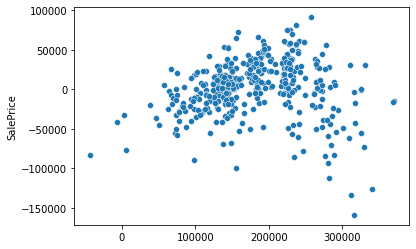

In [50]:
sns.scatterplot(x = predicted_y,y=resid)

In [51]:
mean_squared_error(y_test,predicted_y)**.5

34451.624395210914

# ***Modeling*** Attempt 2

In [52]:
#New features
train['total_sqft'] = [train['1st Flr SF'][x] + train['2nd Flr SF'][x] + train['BsmtFin SF 1'][x] for x in range(len(train['1st Flr SF']))]
test['total_sqft'] = [test['1st Flr SF'][x] + test['2nd Flr SF'][x] + test['BsmtFin SF 1'][x] for x in range(len(test['1st Flr SF']))]

In [53]:
features = ['Lot Area','Lot Frontage', 'Overall Qual', 'Overall Cond','Age_house','total_sqft','Full Bath', 'Half Bath','Central Air_N', 'Central Air_Y',
            'House Style_1.5Fin','House Style_1.5Unf','House Style_1Story','House Style_2.5Fin','House Style_2.5Unf','House Style_2Story','House Style_SFoyer',
            'House Style_SLvl']
X= train[features]
y= train['SalePrice']

In [54]:
#Testing through 1000 diff random_states
pre_results = 100_000_000
best_state = 0 
for x in range(1000): 
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = .8, random_state = x)
    model2 = LinearRegression()
    model2.fit(X_train,y_train)
    predicted_y = model2.predict(X_test)
    result = mean_squared_error(y_test,predicted_y)**.5
    if result < pre_results:
        best_state  = x 
        pre_results = mean_squared_error(y_test,predicted_y)**.5
print(f'Best state: {best_state} MSE^.5:{pre_results}')

Best state: 394 MSE^.5:26564.60147357879


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = .8, random_state =394)
model2 = LinearRegression()

In [56]:
model2.fit(X_train,y_train)
model2.coef_

array([ 9.78980252e-01,  2.30855417e+02,  2.75773517e+04,  3.89789810e+03,
       -3.70890166e+02,  3.32363706e+01,  1.15690268e+04,  7.67651744e+03,
        2.26390461e+03, -2.26390461e+03,  1.39434253e+03,  2.49754576e+03,
        4.30687836e+03,  1.45942521e+04,  2.69160536e+03, -7.45686718e+03,
       -4.88104612e+03, -1.31467108e+04])

In [57]:
predicted_y = model2.predict(X_test)

In [58]:
model2.score(X_test,y_test)

0.8348375977502132

In [59]:
model2.score(X_train,y_train)

0.7813015626602585

In [60]:
mean_squared_error(y_test,predicted_y)

705678051.4500644

In [61]:
mean_squared_error(y_test,predicted_y)**.5

26564.60147357879

In [62]:
resid = predicted_y - y_test

<AxesSubplot:ylabel='SalePrice'>

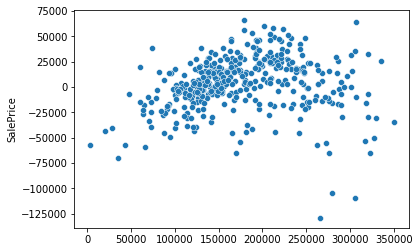

In [63]:
sns.scatterplot(x = predicted_y,y=resid)

# ***Model 3: Ridge***

In [64]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV

In [65]:
#Ridge regession -> adapted from the 4.02 lesson
X = train[features]
y = train['SalePrice']
ss = StandardScaler()
polynomial = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_overfit = polynomial.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_overfit, y,train_size = .8, random_state = 93)
Z_train = ss.fit_transform(X_train)
Z_test = ss.fit_transform(X_test)
    
ridge_model = Ridge()
r_alphas = np.logspace(0, 5, 100)
ridge_cv = RidgeCV(alphas = r_alphas, scoring = 'r2', cv = 5)
ridge_cv = ridge_cv.fit(Z_train,y_train)


In [66]:
ridge_cv.alpha_

1707.3526474706905

In [67]:
print(ridge_cv.score(Z_train,y_train))
print(ridge_cv.score(Z_test,y_test))

0.808227719132654
0.8040258646188099


# ***Model 4: OLS***

In [68]:
#Testing through 1000 diff random_states/ Regulizing the data: this was accomplished through the 4.02 lesson notes 
X = train[features]
y = train['SalePrice']
pre_results = 100_000_000
best_state = 0 
polynomial = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_overfit = polynomial.fit_transform(X)
for x in range(1000): 
    X_train, X_test, y_train, y_test = train_test_split(X_overfit, y,train_size = .8, random_state = x)
    ss = StandardScaler()
    Z_train = ss.fit_transform(X_train)
    Z_test = ss.fit_transform(X_test)
    model2 = LinearRegression()
    model2.fit(Z_train,y_train)
    predicted_y = model2.predict(Z_test)
    result = mean_squared_error(y_test,predicted_y)**.5
    if result < pre_results:
        best_state  = x 
        pre_results = mean_squared_error(y_test,predicted_y)**.5
print(f'Best state: {best_state} MSE^.5:{pre_results}')

Best state: 145 MSE^.5:27539.858802092007


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_overfit, y,train_size = .8, random_state =145)
Z_train = ss.fit_transform(X_train)
Z_test = ss.fit_transform(X_test)
model4 = LinearRegression()
model4.fit(Z_train,y_train)
predicted_y = model4.predict(Z_test)

In [70]:
resids = predicted_y - y_test

In [71]:
sse = (resids**2).sum()

In [72]:
MSE = sse / len(resids)

In [73]:
MSE**.5

27539.858802092007

In [74]:
mean_squared_error(y_test,predicted_y)**.5

27539.858802092007

# ***Model 5: Lasso***

In [118]:
from sklearn.linear_model import Lasso, LassoCV

In [159]:
#This code was adapted from lesson 4.02
m_alphas = np.logspace(1,300,200)
model5 = LassoCV(alphas=m_alphas, cv=5, max_iter=500_000, tol = 10)
#Using Z_test from model 4 
model5.fit(Z_train, y_train)

LassoCV(alphas=array([1.00000000e+001, 3.18062569e+002, 1.01163798e+004, 3.21764175e+005,
       1.02341140e+007, 3.25508860e+008, 1.03532184e+010, 3.29297126e+011,
       1.04737090e+013, 3.33129479e+014, 1.05956018e+016, 3.37006433e+017,
       1.07189132e+019, 3.40928507e+020, 1.08436597e+022, 3.44896226e+023,
       1.09698580e+025, 3.48910121e+026, 1.10975250e+028, 3.52970730e+029,
       1.122667...
       2.83309610e+271, 9.01101825e+272, 2.86606762e+274, 9.11588830e+275,
       2.89942285e+277, 9.22197882e+278, 2.93316628e+280, 9.32930403e+281,
       2.96730241e+283, 9.43787828e+284, 3.00183581e+286, 9.54771611e+287,
       3.03677112e+289, 9.65883224e+290, 3.07211300e+292, 9.77124154e+293,
       3.10786619e+295, 9.88495905e+296, 3.14403547e+298, 1.00000000e+300]),
        cv=5, max_iter=500000, tol=10)

In [160]:
model5.n_iter_

1

In [161]:
model5.alpha_

1e+300

# ***Model 6***

In [78]:
train.columns

Index(['Id', 'PID', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Utilities', 'Neighborhood', 'Bldg Type',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Foundation',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd',
       'Functional', 'Garage Type', 'Garage Cars', 'Paved Drive',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'SalePrice',
       'Age_house', 'Central Air_N', 'Central Air_Y', 'House Style_1.5Fin',
       'House Style_1.5Unf', 'House Style_1Story', 'House Style_2.5Fin',
       'House Style_2.5Unf', 'House Style_2Story', 'House Style_SFoyer',
       'House Style_SLvl', 'Bsmt Qual_Ex', 'Bsmt Qual_Fa', 'Bsmt Qua

In [79]:
test.columns

Index(['Id', 'PID', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Lot Shape',
       'Land Contour', 'Utilities', 'Neighborhood', 'Bldg Type',
       'Overall Qual', 'Overall Cond', 'Foundation', 'BsmtFin Type 1',
       'BsmtFin SF 1', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Functional',
       'Garage Type', 'Garage Cars', 'Paved Drive', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Age_house', 'Central Air_N',
       'Central Air_Y', 'House Style_1.5Fin', 'House Style_1.5Unf',
       'House Style_1Story', 'House Style_2.5Fin', 'House Style_2.5Unf',
       'House Style_2Story', 'House Style_SFoyer', 'House Style_SLvl',
       'Bsmt Qual_Ex', 'Bsmt Qual_Fa', 'Bsmt Qual_Gd', 'Bsmt Qual_NA',
    

In [80]:
features1 = ['Lot Area','Lot Frontage', 'Overall Qual', 'Overall Cond','Age_house','total_sqft','Full Bath', 'Half Bath','Central Air_N', 'Central Air_Y',
            'House Style_1.5Fin','House Style_1.5Unf','House Style_1Story','House Style_2.5Fin','House Style_2.5Unf','House Style_2Story','House Style_SFoyer',
            'House Style_SLvl','Exter Qual_Ex','Exter Qual_Fa', 'Exter Qual_Gd', 'Exter Qual_TA', 'Exter Cond_Ex','Exter Cond_Fa', 'Exter Cond_Gd', 
            'Exter Cond_Po', 'Exter Cond_TA']
X= train[features1]
y= train['SalePrice']

In [81]:
#Testing through 1000 diff random_states
pre_results = 100_000_000
best_state = 0 
for x in range(1000): 
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = .8, random_state = x)
    model6 = LinearRegression()
    model6.fit(X_train,y_train)
    predicted_y = model6.predict(X_test)
    result = mean_squared_error(y_test,predicted_y)**.5
    if result < pre_results:
        best_state  = x 
        pre_results = mean_squared_error(y_test,predicted_y)**.5
print(f'Best state: {best_state} MSE^.5:{pre_results}')

Best state: 131 MSE^.5:24667.639642424707


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = .8, random_state = 131)
model6 = LinearRegression()
model6.fit(X_train,y_train)

LinearRegression()

In [83]:
predicted_y = model6.predict(X_test)

In [84]:
mean_squared_error(y_test,predicted_y)**.5

24667.639642424707

# ***Model 7***

In [85]:
features = ['BsmtFin SF 1','Bsmt Unf SF','Overall Qual','Overall Cond','Bedroom AbvGr',
            'Kitchen Qual_Ex', 'Kitchen Qual_Fa', 'Kitchen Qual_Gd','Kitchen Qual_TA',
            'Exter Qual_Ex','Exter Qual_Fa',  'Exter Qual_TA', 'Exter Cond_Ex','Exter Cond_Fa',  
            'Exter Cond_Po', 'Exter Cond_TA','Bsmt Qual_Ex', 'Bsmt Qual_Fa',  'Bsmt Qual_NA', 'Bsmt Qual_Po', 
            'Bsmt Qual_TA', 'Bsmt Cond_Fa',  'Bsmt Cond_NA', 'Bsmt Cond_TA','Bsmt Qual_Gd', 'Bsmt Cond_Gd','Exter Cond_Gd','Exter Qual_Gd']
X= train[features]
y= train['SalePrice']

In [86]:
#Testing through 1000 diff random_states
pre_results = 100_000_000
best_state = 0 
for x in range(1000): 
    X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = .8, random_state = x)
    model7 = LinearRegression()
    model7.fit(X_train,y_train)
    predicted_y = model7.predict(X_test)
    result = mean_squared_error(y_test,predicted_y)**.5
    if result < pre_results:
        best_state  = x 
        pre_results = mean_squared_error(y_test,predicted_y)**.5
print(f'Best state: {best_state} MSE^.5:{pre_results}')

Best state: 131 MSE^.5:28624.0719773191


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = .8, random_state = 131)
model7 = LinearRegression()
model7.fit(X_train,y_train)

LinearRegression()

In [88]:
model7.score(X_test,y_test)

0.8154684065344013

In [112]:
predicted_y = model7.predict(X_test)
coefs =model7.coef_


In [116]:
for x in range(len(features)):
    print(f' Coef of {features[x]}: {coefs[x]}')

 Coef of BsmtFin SF 1: 39.652572313726345
 Coef of Bsmt Unf SF: 17.235953732702626
 Coef of Overall Qual: 22110.306127145734
 Coef of Overall Cond: 2554.7498982799393
 Coef of Bedroom AbvGr: 15351.567786949769
 Coef of Kitchen Qual_Ex: 32329.177836248513
 Coef of Kitchen Qual_Fa: -12592.847893640483
 Coef of Kitchen Qual_Gd: -5487.318682907471
 Coef of Kitchen Qual_TA: -14249.011259700577
 Coef of Exter Qual_Ex: 29111.356456186928
 Coef of Exter Qual_Fa: -15576.157922858129
 Coef of Exter Qual_TA: -15703.678569953072
 Coef of Exter Cond_Ex: 7349.807123568541
 Coef of Exter Cond_Fa: -10363.476516283587
 Coef of Exter Cond_Po: 5773.501397144522
 Coef of Exter Cond_TA: -4378.915334550374
 Coef of Bsmt Qual_Ex: 35685.544285156226
 Coef of Bsmt Qual_Fa: -22618.793497964067
 Coef of Bsmt Qual_NA: 8301.637144291466
 Coef of Bsmt Qual_Po: -1016.3122727908321
 Coef of Bsmt Qual_TA: -18407.331220138145
 Coef of Bsmt Cond_Fa: 2592.7481082348704
 Coef of Bsmt Cond_NA: 8301.637144291466
 Coef of Bs

In [90]:
mean_squared_error(y_test,predicted_y)**.5

28624.0719773191

# ***Exporting Refined Files***

In [91]:
test['SalePrice'] = model6.predict(test[features1]) 

In [92]:
test = test[['Id','SalePrice']]
test.columns

Index(['Id', 'SalePrice'], dtype='object')

In [93]:
test.to_csv('datasets/Kaggle_Parker.csv',index=False)